## A simple plotting script for comparing two spectra

I work largely in the radio and sub-millimetre, where we tend to use both frequency and velocity (relative to a given line). This script plots both on opposite axes.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

We need something to plot, so first I generate two spectra. In this case they correspond to two observations of the same two molecular lines, but with different observational uncertainties (although with no absolute calibration error). The frequencies are binned in 30MHz channels and the velocities are then defined relative to a line frequency of 84.77GHz.

For those interested: in the original script, these two spectra were actually from the same observations, but comparing two methods of extracting the spectrum.

In [20]:
def gauss(x, A, mu, FWHM):
    return A * np.exp((-(x-mu)**2)/((FWHM**2)/(4*np.log(2))))

#Channel flux uncertainties
sig1 = 0.5
sig2 = 1.5

freqs = np.arange(84.1, 85.1, 0.03)
vels = -1 * ((freqs-84.77)/84.77) * 3e5

fluxes1 = np.random.randn(len(vels)) * 0.5
fluxes1 += gauss(vels, 5., 0, 300)
fluxes1 += gauss(vels, 3.5, 1000, 300)

fluxes2 = np.random.randn(len(vels)) * 1.5
fluxes2 += gauss(vels, 5., 0, 300)
fluxes2 += gauss(vels, 3.5, 1000, 300)

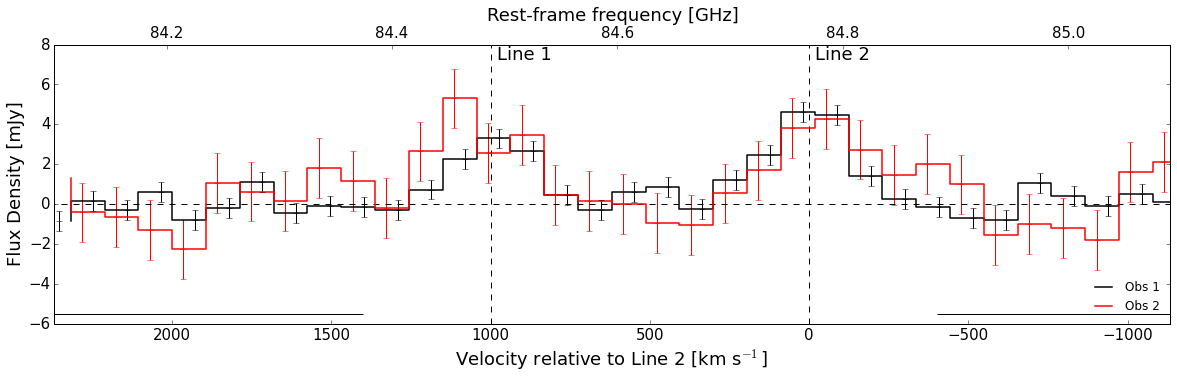

In [21]:
#####################
## Compare spectra ##
#####################

f, ax1 = plt.subplots(1, 1, figsize=(20,5))
ax2 = ax1.twiny()

ax1.plot(vels - abs((vels[1]-vels[0])/2.), fluxes1, 'k', lw=1.5, ls='steps',
         label='Obs 1')
ax1.plot(vels - abs((vels[1]-vels[0])/2.), fluxes2, 'r', lw=1.5, ls='steps',
         label='Obs 2')
ax1.errorbar(vels - abs((vels[1]-vels[0])/6.), fluxes1, sig1, fmt='+',
             color='k')
ax1.errorbar(vels + abs((vels[1]-vels[0])/6.), fluxes2, sig2, fmt='+',
             color='r')

ax1.hlines(0, 2500, -1500, 'k', linestyles='dashed')
ax1.text(980, 7.25, 'Line 1', fontsize=18)
ax1.text(-20, 7.25,'Line 2', fontsize=18)

legend = ax1.legend(loc=4, frameon=False)
legend.get_frame().set_facecolor('white')

ax1.set_xlim(vels.max(), vels.min())
ax1.set_ylim(-6, 8)
ax1.set_xlabel(r'Velocity relative to Line 2 [km s$^{-1}$]', fontsize=18)
ax1.set_ylabel('Flux Density [mJy]', fontsize=18)
ax2.set_xlabel('Rest-frame frequency [GHz]', fontsize=18)

ax1.tick_params(axis='both', which='major', labelsize=15)
ax2.tick_params(axis='both', which='major', labelsize=15)

ax2.set_xlim(freqs[0], freqs[-1])
ax1.vlines([1000., 0], ax1.get_ylim()[0], ax1.get_ylim()[1], linestyles='dashed')

ax1.hlines([-5.5], 2400, 1400, colors='k')
ax1.hlines([-5.5], -400, -1400, colors='k')

# plt.savefig('BlogFig1.pdf',bbox_inches='tight')

It's worth quickly going over some of the steps in the above plotting code.

In lines 4-7 I plot the spectra using the standard pyplot.plot function, but with the 'steps' linestyle. As we're plotting up channel binned spectra with relatively few spectral points this is much more representative than a line plot. Point plotting is a valid alternative, but I prefer steps as they show very clearly that the measurement is averaged over a 30MHz range. I've included below an example using points.

An issue with the pyplot.plot steps style is that is expects to be given the step edges, not the bin centres. I therefore have to offset the velocity values by a half bin width.

Line 18: this sets the legend background to be white instead of transparent. This is useful if you want the legend to be visible and are not concerned about data in the corner being covered.


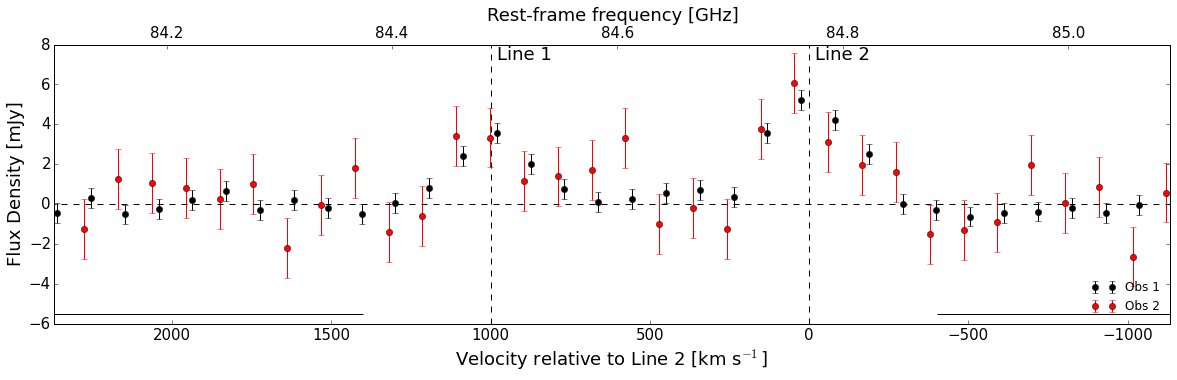

In [17]:
##############################
## A point spectrum example ##
##############################

f, ax1 = plt.subplots(1, 1, figsize=(20,5))
ax2 = ax1.twiny()

ax1.errorbar(vels - abs((vels[1]-vels[0])/10.), fluxes1, sig1, fmt='o',
             color='k', label='Obs 1')
ax1.errorbar(vels + abs((vels[1]-vels[0])/10.), fluxes2, sig2, fmt='o',
             color='r', label='Obs 2')

ax1.hlines(0, 2500, -1500, 'k', linestyles='dashed')
ax1.text(980, 7.25, 'Line 1', fontsize=18)
ax1.text(-20, 7.25,'Line 2', fontsize=18)

legend = ax1.legend(loc=4, frameon=False)
legend.get_frame().set_facecolor('white')

ax1.set_xlim(vels.max(), vels.min())
ax1.set_ylim(-6, 8)
ax1.set_xlabel(r'Velocity relative to Line 2 [km s$^{-1}$]', fontsize=18)
ax1.set_ylabel('Flux Density [mJy]', fontsize=18)
ax2.set_xlabel('Rest-frame frequency [GHz]', fontsize=18)

ax1.tick_params(axis='both', which='major', labelsize=15)
ax2.tick_params(axis='both', which='major', labelsize=15)

ax2.set_xlim(freqs[0], freqs[-1])
ax1.vlines([1000., 0], ax1.get_ylim()[0], ax1.get_ylim()[1], linestyles='dashed')

ax1.hlines([-5.5], 2400, 1400, colors='k')
ax1.hlines([-5.5], -400, -1400, colors='k')

# plt.savefig('BlogFig1.pdf',bbox_inches='tight')